In [1]:
import pandas as pd
import numpy as np

file = '../../../DATA/OSA_python.xlsx'
data = pd.read_excel(file)
df = pd.DataFrame(data)

In [2]:
df.set_index('Patient', inplace=True)
df.head()

,Gender,IAH,Weight,Height,Age,Cervical,BMI
Patient,,,,,,,
P0002,1,29.6,119,174,56,48.0,0.003931
P0004,1,19.7,78,168,39,42.0,0.002764
P0005,1,9.0,80,173,32,40.0,0.002673
P0006,1,2.0,109,190,32,42.0,0.003019
P0007,1,34.0,86,169,39,42.0,0.003011


In [3]:
#features 
predictors = ['Gender', 'Weight', 'Height', 'Age', 'Cervical', 'BMI']
x = df[predictors].values
y = df['IAH'].values

### Fittings (not part of the problem)

In [ ]:
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets

#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
x, y = datasets.make_regression(n_samples=30, n_features=1, noise=10)

y=y**2
model = LinearRegression().fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x,model.predict(x), "g")
plt.show()

In [ ]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor
x_test= np.linspace(x.min(),x.max(), 100)[:, np.newaxis]

model = DecisionTreeRegressor().fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "g")
plt.show()

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "g")
plt.show()

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "g")
plt.show()

# Approach 1. Only split train test

In [4]:
from sklearn import model_selection
from sklearn import linear_model

import matplotlib.pyplot as plt
from sklearn.metrics import  mean_absolute_error, mean_squared_error, max_error, r2_score


x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size= 0.2)


In [5]:
from sklearn.linear_model import LinearRegression
model_linear = linear_model.LinearRegression().fit(x_train,y_train)

y_out_linear = model_linear.predict(x_test)

mse_lin_1 = mean_squared_error(y_test, y_out_linear)
rmse_lin_1 =  mean_squared_error(y_test, y_out_linear, squared=False)
mae_lin_1 = mean_absolute_error(y_test, y_out_linear)
r2_lin_1 = r2_score(y_test, y_out_linear)

print("MSE: ",mse_lin_1)
print("RMSE: ",rmse_lin_1)
print("MAE: ",mae_lin_1)
print("R2 score: ",r2_lin_1)


MSE:  289.14499887062556
RMSE:  17.00426413787511
MAE:  12.401457979356518
R2 score:  0.16593434592815326


In [6]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor().fit(x_train, y_train)

y_out_tree = model_tree.predict(x_test)

mse_tree_1 = mean_squared_error(y_test, y_out_tree)
rmse_tree_1 =  mean_squared_error(y_test, y_out_tree, squared=False)
mae_tree_1 = mean_absolute_error(y_test, y_out_tree)
r2_tree_1 = r2_score(y_test, y_out_tree)

print("MSE: ",mse_tree_1)
print("RMSE: ",rmse_tree_1)
print("MAE: ",mae_tree_1)
print("R2 score: ",r2_tree_1)

MSE:  462.5326771653543
RMSE:  21.506572882850357
MAE:  15.192913385826772
R2 score:  -0.33421854576892507


In [7]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor().fit(x_train, y_train)

y_out_forest = model_forest.predict(x_test)

mse_for_1 = mean_squared_error(y_test, y_out_forest)
rmse_for_1 =  mean_squared_error(y_test, y_out_forest, squared=False)
mae_for_1 = mean_absolute_error(y_test, y_out_forest)
r2_for_1 = r2_score(y_test, y_out_forest)
print("MSE: ",mse_for_1)
print("RMSE: ",rmse_for_1)
print("MAE: ",mae_for_1)
print("R2 score: ",r2_for_1)


MSE:  275.46740333291336
RMSE:  16.597210709420825
MAE:  12.39151496062992
R2 score:  0.20538864295162174


In [8]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor().fit(x_train, y_train)

y_out_knn = model_knn.predict(x_test)

mse_knn_1 = mean_squared_error(y_test, y_out_knn)
rmse_knn_1 =  mean_squared_error(y_test, y_out_knn, squared=False)
mae_knn_1 = mean_absolute_error(y_test, y_out_knn)
r2_knn_1 = r2_score(y_test, y_out_knn)
print("MSE: ",mse_knn_1)
print("RMSE: ",rmse_knn_1)
print("MAE: ",mae_knn_1)
print("R2 score: ",r2_knn_1)

MSE:  306.57037593700784
RMSE:  17.50915120549845
MAE:  13.278204724409452
R2 score:  0.11566922435562454


In [9]:
from sklearn.svm import SVR

model_svr = SVR().fit(x_train,y_train)
y_out_svr = model_svr.predict(x_test)

mse_svr_1 = mean_squared_error(y_test, y_out_svr)
rmse_svr_1 =  mean_squared_error(y_test, y_out_svr, squared=False)
mae_svr_1 = mean_absolute_error(y_test, y_out_svr)
r2_svr_1 = r2_score(y_test, y_out_svr)
print("MSE: ",mse_svr_1)
print("RMSE: ",rmse_svr_1)
print("MAE: ",mae_svr_1)
print("R2 score: ",r2_svr_1)


MSE:  341.4135688724092
RMSE:  18.47737992444841
MAE:  12.531372921980884
R2 score:  0.015160792187927652


# Approach 2.  Add cross_val_predict to plot predictios only
## use cross_val_score to use metrics

In [10]:
from sklearn.model_selection import cross_val_predict, cross_val_score

## LINEAR REGRESSION

In [11]:
from sklearn.linear_model import LinearRegression
model_linear = linear_model.LinearRegression()


In [12]:

mse_lin_2 = cross_val_score(model_linear, x, y, cv = 3, scoring = 'neg_mean_squared_error')
rmse_lin_2 = cross_val_score(model_linear, x, y, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_lin_2 = cross_val_score(model_linear, x, y, cv = 3, scoring = 'neg_mean_absolute_error')
r2_lin_2 = cross_val_score(model_linear, x, y, cv = 3, scoring = 'r2')

print("MSE cross validated: ",abs(mse_lin_2.mean()))
print("RMSE cross validated: ",abs(rmse_lin_2.mean()))
print("MAE cross validated: ",abs(mae_lin_2.mean()))
print("R2 score cross validated: ",r2_lin_2.mean())

MSE cross validated:  273.0133151369417
RMSE cross validated:  16.421166927819595
MAE cross validated:  12.471179662938994
R2 score cross validated:  0.21384429042318578


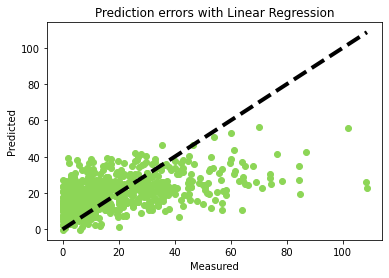

In [13]:
y_out_linear = cross_val_predict(model_linear, x, y, cv = 3) #Para pintar solo
fig, ax = plt.subplots()
ax.scatter(y, y_out_linear, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with Linear Regression')
plt.show()



## Decision tree

In [14]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor()

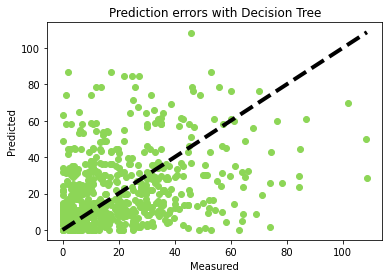

In [15]:
y_out_tree = cross_val_predict(model_tree, x, y, cv = 3)

fig, ax = plt.subplots()
ax.scatter(y, y_out_tree, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with Decision Tree')
plt.show()


In [16]:

mse_tree_2 = cross_val_score(model_tree, x, y, cv = 3, scoring = 'neg_mean_squared_error')
rmse_tree_2 = cross_val_score(model_tree, x, y, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_tree_2 = cross_val_score(model_tree, x, y, cv = 3, scoring = 'neg_mean_absolute_error')
r2_tree_2= cross_val_score(model_tree, x, y, cv = 3, scoring = 'r2')

print("MSE cross validated: ",abs(mse_tree_2.mean()))
print("RMSE cross validated: ",abs(rmse_tree_2.mean()))
print("MAE cross validated: ",abs(mae_tree_2.mean()))
print("R2 score cross validated: ",r2_tree_2.mean())

MSE cross validated:  516.8365863155385
RMSE cross validated:  22.797599990527385
MAE cross validated:  16.692343139884944
R2 score cross validated:  -0.48791853747500924


## Random forest

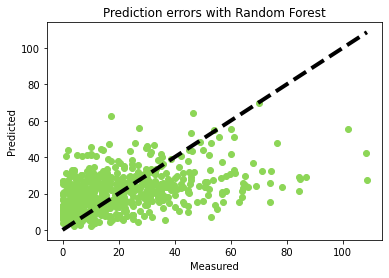

In [17]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor()

y_out_forest = cross_val_predict(model_forest, x, y, cv = 3)

fig, ax = plt.subplots()
ax.scatter(y, y_out_forest, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with Random Forest')
plt.show()



In [18]:
mse_for_2 = cross_val_score(model_forest, x, y, cv = 3, scoring = 'neg_mean_squared_error')
rmse_for_2 = cross_val_score(model_forest, x, y, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_for_2 = cross_val_score(model_forest, x, y, cv = 3, scoring = 'neg_mean_absolute_error')
r2_for_2 = cross_val_score(model_forest, x, y, cv = 3, scoring = 'r2')

print("MSE cross validated: ",abs(mse_for_2.mean()))
print("RMSE cross validated: ",abs(rmse_for_2.mean()))
print("MAE cross validated: ",abs(mae_for_2.mean()))
print("R2 score cross validated: ",r2_for_2.mean())

MSE cross validated:  289.58925738889826
RMSE cross validated:  17.076644017800646
MAE cross validated:  12.810420876926287
R2 score cross validated:  0.15770045675746025


## K Nearest Neighbors

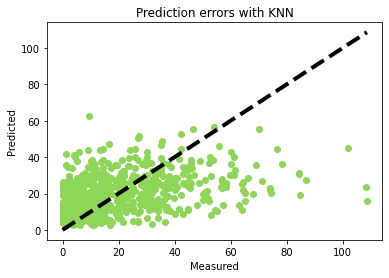

In [19]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor()

y_out_knn = cross_val_predict(model_knn, x, y, cv = 3)

fig, ax = plt.subplots()
ax.scatter(y, y_out_knn, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with KNN')
plt.show()

In [20]:
mse_knn_2 = cross_val_score(model_knn, x, y, cv = 3, scoring = 'neg_mean_squared_error')
rmse_knn_2 = cross_val_score(model_knn, x, y, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_knn_2 = cross_val_score(model_knn, x, y, cv = 3, scoring = 'neg_mean_absolute_error')
r2_knn_2 = cross_val_score(model_knn, x, y, cv = 3, scoring = 'r2')

print("MSE cross validated: ",abs(mse_knn_2.mean()))
print("RMSE cross validated: ",abs(rmse_knn_2.mean()))
print("MAE cross validated: ",abs(mae_knn_2.mean()))
print("R2 score cross validated: ",r2_knn_2.mean())

MSE cross validated:  315.1508027528689
RMSE cross validated:  17.644022403698045
MAE cross validated:  13.145371397061018
R2 score cross validated:  0.09262158568640984


# SVR

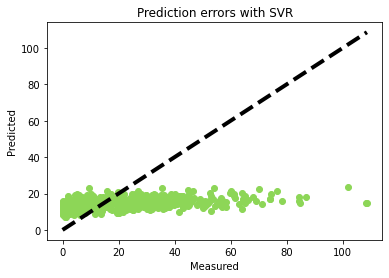

In [21]:

model_svr = SVR().fit(x,y)
y_out_svr = cross_val_predict(model_svr, x, y, cv = 3)

fig, ax = plt.subplots()
ax.scatter(y, y_out_svr, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with SVR')
plt.show()


In [22]:
mse_svr_2 = cross_val_score(model_svr, x, y, cv = 3, scoring = 'neg_mean_squared_error')
rmse_svr_2 = cross_val_score(model_svr, x, y, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_svr_2 = cross_val_score(model_svr, x, y, cv = 3, scoring = 'neg_mean_absolute_error')
r2_svr_2 = cross_val_score(model_svr, x, y, cv = 3, scoring = 'r2')

print("MSE cross validated: ",abs(mse_svr_2.mean()))
print("RMSE cross validated: ",abs(rmse_svr_2.mean()))
print("MAE cross validated: ",abs(mae_svr_2.mean()))
print("R2 score cross validated: ",r2_svr_2.mean())

MSE cross validated:  345.66175793393717
RMSE cross validated:  18.478688204342323
MAE cross validated:  12.95137320142589
R2 score cross validated:  0.0044796386996086195


In [ ]:
results 

In [23]:
results2 = pd.DataFrame({'Model': ['Linear regresion 1', 'Decision Tree 1', 'Random Forest 1', 'KNN 1', 'SVR 1', 
                                  'Linear regresion 2', 'Decision Tree 2', 'Random Forest 2', 'KNN 2', 'SVR 2'],
                        'MSE':   [mse_lin_1, mse_tree_1, mse_for_1, mse_knn_1, mse_svr_1,
                                 abs(mse_lin_2.mean()), abs(mse_tree_2.mean()), abs(mse_for_2.mean()), abs(mse_knn_2.mean()), abs(mse_svr_2.mean())],
                        'RMSE': [rmse_lin_1, rmse_tree_1, rmse_for_1, rmse_knn_1, rmse_svr_1,
                                abs(rmse_lin_2.mean()), abs(rmse_tree_2.mean()), abs(rmse_for_2.mean()), abs(rmse_knn_2.mean()), abs(rmse_svr_2.mean())],
                        'MAE': [mae_lin_1, mae_tree_1, mae_for_1, mae_knn_1, mae_svr_1,
                               abs(mae_lin_2.mean()), abs(mae_tree_2.mean()), abs(mae_for_2.mean()), abs(mae_knn_2.mean()), abs(mae_svr_2.mean())],
                        'R2': [r2_lin_1, r2_tree_1, r2_for_1, r2_knn_1, r2_svr_1,
                              abs(r2_lin_2.mean()), abs(r2_tree_2.mean()), abs(r2_for_2.mean()), abs(r2_knn_2.mean()), abs(r2_svr_2.mean())]})

In [24]:
results2

,Model,MSE,RMSE,MAE,R2
0,Linear regresion 1,289.144999,17.004264,12.401458,0.165934
1,Decision Tree 1,462.532677,21.506573,15.192913,-0.334219
2,Random Forest 1,275.467403,16.597211,12.391515,0.205389
3,KNN 1,306.570376,17.509151,13.278205,0.115669
4,SVR 1,341.413569,18.477380,12.531373,0.015161
5,Linear regresion 2,273.013315,16.421167,12.471180,0.213844
6,Decision Tree 2,516.836586,22.797600,16.692343,0.487919
7,Random Forest 2,289.589257,17.076644,12.810421,0.157700
8,KNN 2,315.150803,17.644022,13.145371,0.092622
9,SVR 2,345.661758,18.478688,12.951373,0.004480


# KFold crossvalidation

In [25]:
#imports si no vamos a hacer lo de fittings
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import  mean_absolute_error, mean_squared_error, max_error, r2_score
from sklearn import model_selection
#from sklearn import datasets
from sklearn.model_selection import KFold

In [29]:
#features 
predictors = ['Gender', 'Weight', 'Height', 'Age', 'Cervical', 'BMI']
x = df[predictors].values
y = df['IAH'].values

In [26]:

models = {"Linear Regression 3":LinearRegression(), \
          "Decision Tree 3 ": DecisionTreeRegressor(), \
          "Random Forest 3": RandomForestRegressor(n_estimators=100), \
          "KNN 3": KNeighborsRegressor(n_neighbors=5), \
          "SVR 3": SVR()}
j=10
for name in models:
    print("Start training models of {}".format(name))
    k = 5
    kf = KFold(n_splits=k)
    precisions = []
    i = 0
    mae_global = []
    mse_global = []
    rmse_global = []
    r2_global = []
    
    for train, test in kf.split(x):
        i+=1
        x_train, x_test = x[train], x[test]
        y_train, y_test = y[train], y[test]
        model = models[name].fit(x_train,y_train)
        y_out = model.predict(x_test)

        mae = mean_absolute_error(y_test, y_out)
        mse = mean_squared_error(y_test, y_out)
        rmse = mean_squared_error(y_test, y_out, squared=False)
        r2 = r2_score(y_test, y_out)
        ...
        
        mae_global.append(mae)
        mse_global.append(mse)
        rmse_global.append(rmse)
        r2_global.append(r2)
        
        results2.loc[j] = [name, np.average(mse_global), np.average(rmse_global), np.average(mae_global), np.average(r2_global)]
        
        print("Iteration {}:mae={:.4f} mse={:.4f} rmse={:.4f} r2={:.4f}".format(i, mae, mse, rmse, r2))
    j+=1
    print("Global: mae={:.4f} mse={:.4f} rmse={:.4f} r2={:.4f}\n".format(np.average(mae_global), np.average(mse_global), np.average(rmse_global), np.average(r2_global)))

Start training models of Linear Regression 3
Iteration 1:mae=11.7069 mse=206.0662 rmse=14.3550 r2=0.3048
Iteration 2:mae=11.3477 mse=196.7352 rmse=14.0262 r2=0.0275
Iteration 3:mae=14.5897 mse=427.4101 rmse=20.6739 r2=0.1889
Iteration 4:mae=11.3326 mse=208.8643 rmse=14.4521 r2=0.1642
Iteration 5:mae=13.4585 mse=335.8650 rmse=18.3266 r2=0.2047
Global: mae=12.4871 mse=274.9882 rmse=16.3668 r2=0.1780

Start training models of Decision Tree 3 
Iteration 1:mae=15.0485 mse=434.2522 rmse=20.8387 r2=-0.4650
Iteration 2:mae=16.2315 mse=470.7047 rmse=21.6957 r2=-1.3269
Iteration 3:mae=15.5835 mse=484.5854 rmse=22.0133 r2=0.0804
Iteration 4:mae=15.8378 mse=474.6666 rmse=21.7868 r2=-0.8993
Iteration 5:mae=17.7520 mse=552.3313 rmse=23.5017 r2=-0.3079
Global: mae=16.0906 mse=483.3081 rmse=21.9673 r2=-0.5838

Start training models of Random Forest 3
Iteration 1:mae=12.0782 mse=237.0617 rmse=15.3968 r2=0.2002
Iteration 2:mae=11.4600 mse=213.0931 rmse=14.5977 r2=-0.0534
Iteration 3:mae=14.4520 mse=394.

In [27]:
results2

,Model,MSE,RMSE,MAE,R2
0,Linear regresion 1,289.144999,17.004264,12.401458,0.165934
1,Decision Tree 1,462.532677,21.506573,15.192913,-0.334219
2,Random Forest 1,275.467403,16.597211,12.391515,0.205389
3,KNN 1,306.570376,17.509151,13.278205,0.115669
4,SVR 1,341.413569,18.477380,12.531373,0.015161
5,Linear regresion 2,273.013315,16.421167,12.471180,0.213844
6,Decision Tree 2,516.836586,22.797600,16.692343,0.487919
7,Random Forest 2,289.589257,17.076644,12.810421,0.157700
8,KNN 2,315.150803,17.644022,13.145371,0.092622
9,SVR 2,345.661758,18.478688,12.951373,0.004480


([None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 None)

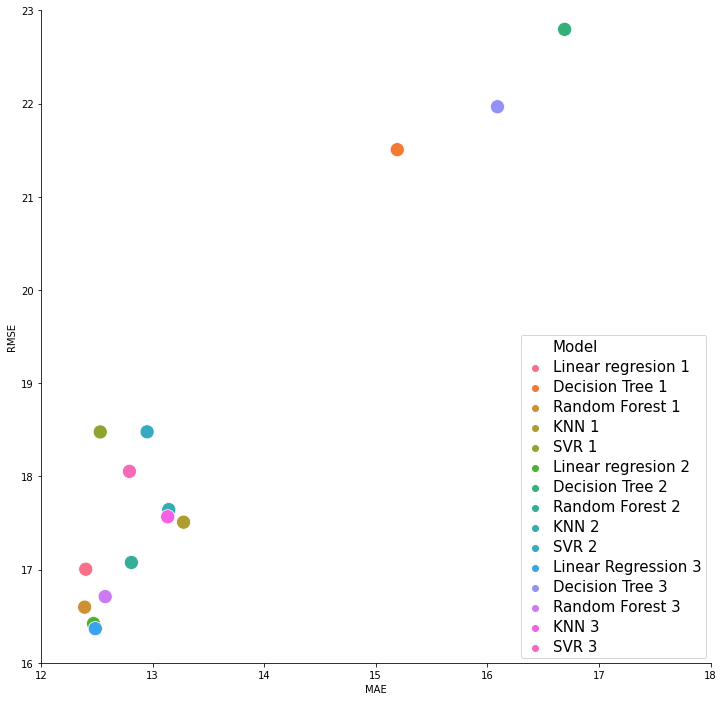

In [30]:
import seaborn as sns
x, y, hue = 'MAE', 'RMSE', 'Model'
plt.rcParams['figure.figsize']=(12,12)
#sns.set_style("white"), sns.set_style("ticks")
ax = sns.scatterplot(x= x, y=y, data = results2, hue = hue, palette="husl", s=200, legend="brief")
#ax.set_xlabel(x,fontsize=20), ax.set_ylabel(y,fontsize=20) 
ax.set(ylim=(16, 23), xlim=(12,18)) 
plt.legend(loc='lower right')
plt.setp(ax.get_legend().get_texts(), fontsize='15'), sns.despine()